Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


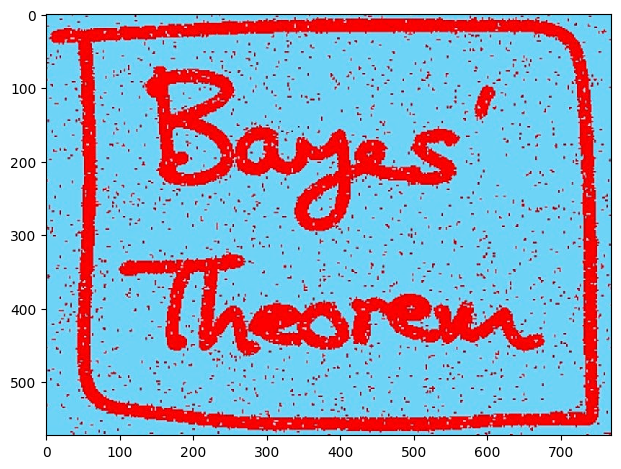

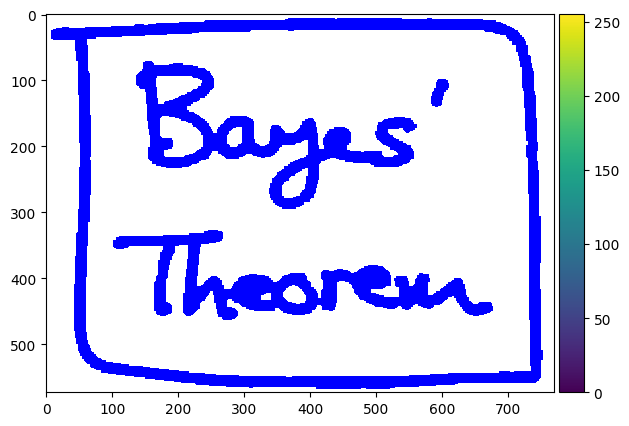

In [10]:
import gco
import skimage.io as io
import numpy as np
import cv2
import matplotlib.pyplot as plt
SOURCE_COLOR = [0, 0, 255 ]   # blue = foreground
SINK_COLOR = [245, 210, 110]  # yellow = background

img = cv2.imread("bayes_in.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.figure(0)
io.imshow( img)
# !!! Be careful when doing this concatenation,
# it seems 'c_' does not create a copy
# u = np.c_[img.flatten().copy(), - img.flatten().copy()]
unary = np.tile(img_gray[:, :, np.newaxis], [1, 1, 2])
unary[:, :, 0] = (img_gray - 28)

unary[:, :, 1] = -(img_gray- 210)

unary += 255
smooth = (1 - np.eye(2)) * 1
new_i = gco.cut_grid_graph_simple(unary/255, smooth, n_iter=-1)

new_image = np.reshape(new_i, img_gray.shape).astype(int)
denoise_img = np.zeros([img.shape[0], img.shape[1], 3])
for i in range(new_image.shape[0]):
    for j in range(new_image.shape[1]):
        if new_image[i,j] == 0 :
            denoise_img[i,j,:] =  SOURCE_COLOR
        else :
            if new_image[i,j] == 1:
                denoise_img[i,j, :] = SINK_COLOR

plt.figure(1)
io.imshow(denoise_img)



In [6]:
import gco
import numpy as np
import cv2
import matplotlib.pyplot as plt

SOURCE_COLOR = [0, 0, 255 ]   # blue = foreground
SINK_COLOR = [245, 210, 110]  # yellow = background


def dist (c1,c2 ):
    return ( abs( c1[0] - c2[0] )+ \
             abs( c1[1] - c2[1] )+ \
             abs( c1[2] - c2[2] )) / 3; 


m_lambda = 50     # change this value to change the weight of the smoothness or prior term

img = cv2.imread("bayes_in.jpg", cv2.COLOR_BGR2GRAY)
print(img.shape[0:2])

H, W = img.shape[0:2]

edges = np.array([])
unary_cost = np.array([])

for x in range (H):
    for y in range (W):

        c = img[x, y]
        
        if x==0 and y ==0:
            unary_cost = np.array([dist(SOURCE_COLOR, c),dist(SINK_COLOR, c)])
        # data term: 
        else:
            unary_cost = np.vstack((unary_cost, np.array([dist(SOURCE_COLOR, c), dist(SINK_COLOR, c)])))

        # prior term: start
        
        node = x * W + y
        ny = y + 1; # the right neighbor
        next_node_r = x*W + ny

        nx = x + 1; # the below neighbor
        next_node_b = nx*H + y

        if x==0 and y ==0:
            edges = np.array([node, next_node_r])
            edges = np.vstack((edges, np.array([node, next_node_b])))
        # data term: 
        else:
            if x<H-1 and y<W-1:
                edges = np.vstack((edges,np.array([node, next_node_r])))
                edges = np.vstack((edges,np.array([node, next_node_b])))
            else:
                if x == H-1 and y != W-1:
                    edges = np.vstack((edges,np.array([node, next_node_r])))
                else:
                    if y == W-1 and x != H-1:
                        edges = np.vstack((edges,np.array([node, next_node_b])))  
        #graph->add_edge(node, next_node, m_lambda, m_lambda )
        # prior term: end
print(unary_cost.shape)
print(edges.shape)
smooth = (1 - np.eye(2))/m_lambda
tweights = np.zeros([edges.shape[0], 1])

labels = gco.cut_general_graph(edges, tweights, unary_cost, smooth, n_iter=1)
new_image = np.reshape(labels, [H, W])
plt.figure()
plt.imshow(new_image)



array([[210, 210, 210, ..., 210, 210, 210],
       [210, 210, 210, ..., 210, 210, 210],
       [210, 210, 210, ..., 210, 210, 210],
       ...,
       [210, 210, 210, ..., 210, 210, 210],
       [210, 210, 210, ..., 210, 210, 210],
       [210, 210, 210, ..., 210, 210, 210]])

In [92]:
img_sink = np.ones([H,W,3])

new_image = np.reshape(labels, [H, W])
img_rgb = np.ones([H,W,3])
#for i in range(0,3):
#for d in range(0,3):
for x in range(0,H):
    for y in range(0,W):
        if new_image[x,y]==0:
            img_rgb[x,y,:] = 




img_sink = SINK_COLOR * np.ones([H,W,3])
img_source = SOURCE_COLOR * np.ones([H,W,3])


img_rgb = new_image * img_source + (1 - new_image) * img_sink

plt.figure(0)
plt.imshow( new_image)
plt.figure(1)
plt.imshow(img_rgb)

ValueError: operands could not be broadcast together with shapes (573,769) (573,769,3) 

[[4.76405235 3.40015721 3.97873798 ... 4.78587049 3.12691209 3.40198936]
 [4.8831507  1.65224094 1.729515   ... 3.82350415 5.16323595 4.33652795]
 [2.63081816 2.76062082 4.0996596  ... 3.58295368 2.60055097 3.37005589]
 ...
 [2.94475621 3.13064302 3.44069106 ... 3.97220715 2.08104952 3.6632405 ]
 [2.8665086  1.43362966 1.25134856 ... 3.0708476  5.43572851 3.9716812 ]
 [2.06703779 5.86520354 1.20795201 ... 3.51687218 2.96707931 4.29811143]]
[[3.23594765 4.59984279 4.02126202 ... 3.21412951 4.87308791 4.59801064]
 [3.1168493  6.34775906 6.270485   ... 4.17649585 2.83676405 3.66347205]
 [5.36918184 5.23937918 3.9003404  ... 4.41704632 5.39944903 4.62994411]
 ...
 [5.05524379 4.86935698 4.55930894 ... 4.02779285 5.91895048 4.3367595 ]
 [5.1334914  6.56637034 6.74865144 ... 4.9291524  2.56427149 4.0283188 ]
 [5.93296221 2.13479646 6.79204799 ... 4.48312782 5.03292069 3.70188857]]


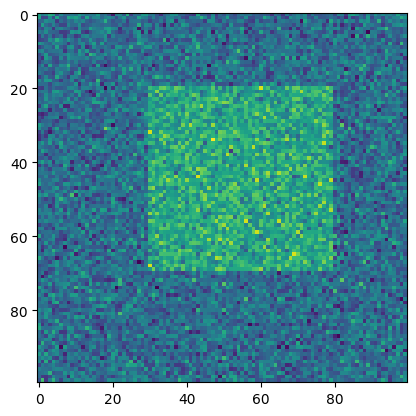

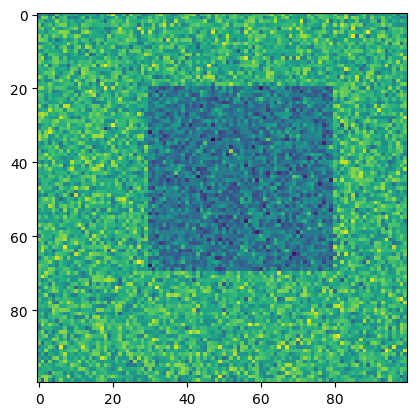

In [11]:
import numpy as np
import matplotlib.pyplot as plt
annot = np.zeros((100, 100))
annot[20:70, 30:80] = 1
np.random.seed(0)
img = np.random.randn(*annot.shape)
img += 2 * annot - 1

# !!! Be careful when doing this concatenation,
# it seems 'c_' does not create a copy
# u = np.c_[img.flatten().copy(), - img.flatten().copy()]

unary = np.tile(img[:, :, np.newaxis], [1, 1, 2])
unary[:, :, 0] = img
unary[:, :, 1] = -img
unary += 4
print(unary[:, :, 0])
print(unary[:, :, 1])
plt.figure()
plt.imshow(unary[:, :, 0])
plt.figure()
plt.imshow(unary[:, :, 1])
